# Demo: Iris

This notebook compares how UMAP and the $k$-nearest minimum spanning tree ($k$-MST) behave on the Iris dataset. The dataset consists of two clusters that only connect when considering the $26$-nearest neighbors. Our goal is to find a graph with a single connected component that describes how these clusters are oriented, while maintaining their local structure.

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from umap import UMAP
from sklearn.datasets import load_iris

import warnings
from numba import NumbaPendingDeprecationWarning
# UMAP warns when spectral initialisation fails or points are not connected
warnings.filterwarnings("ignore", category=UserWarning)
# UMAP / PYNNDescent not yet updated for recent numba versions
warnings.filterwarnings("ignore", category=NumbaPendingDeprecationWarning)

from multi_mst import KMST
from lib.drawing import draw_umap

In [ ]:
X, y = load_iris(return_X_y=True)

## UMAP layouts

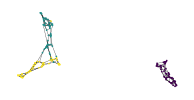

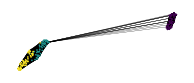

In [18]:
for k in [5, 40]:
    p = UMAP(n_neighbors=k, repulsion_strength=0.1, min_dist=0.2).fit(X)
    draw_umap(p, color=y, name="iris", alg=f"umap_{k}", size=1.2, alpha=1)

# $k$-MST layouts

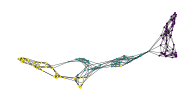

In [54]:
k = 5
p = KMST(num_neighbors=k, repulsion_strength=0.1, min_dist=0.2).fit(X)
draw_umap(p, color=y, name="iris", alg=f"kmst_{k}", size=1.2, alpha=1)